In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [3]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [5]:
df.isnull().sum() #checking for missing values

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [7]:
df.duplicated().sum()   # check no of duplicate rows

27

In [8]:
df.drop_duplicates(inplace=True)  # drop duplicate rows

In [10]:
df.duplicated().sum()   # All duplicates are removed

0

Q2. What is the distribution of popularity among the tracks? Visualize it using a histogram

In [11]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

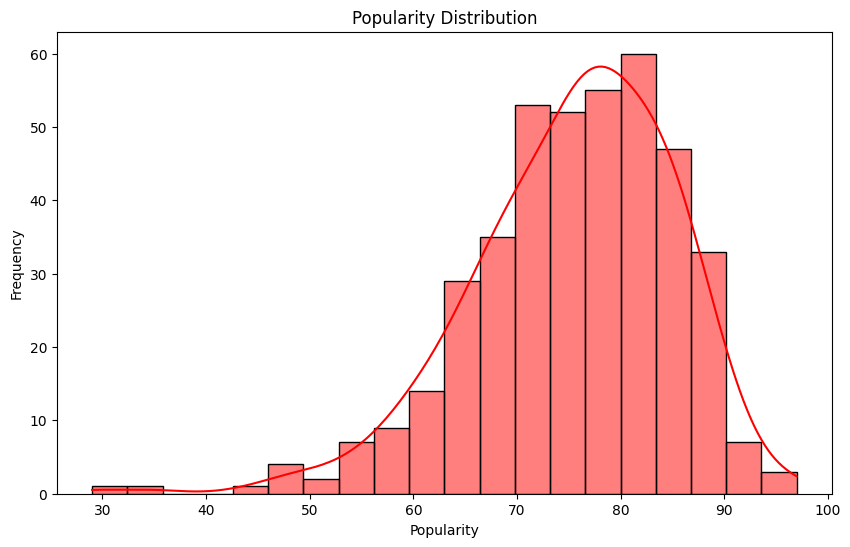

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='red')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

Q3. Is there any relationship between the popularity and the duration of tracks? Use a scatter plot.

In [22]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [23]:
df[['Popularity','Duration (ms)']]

,Popularity,Duration (ms)
0,92,319191
1,91,173986
2,90,260111
3,88,247444
4,88,218364
...,...,...
433,54,163971
434,65,187521
436,64,191900
437,69,283693


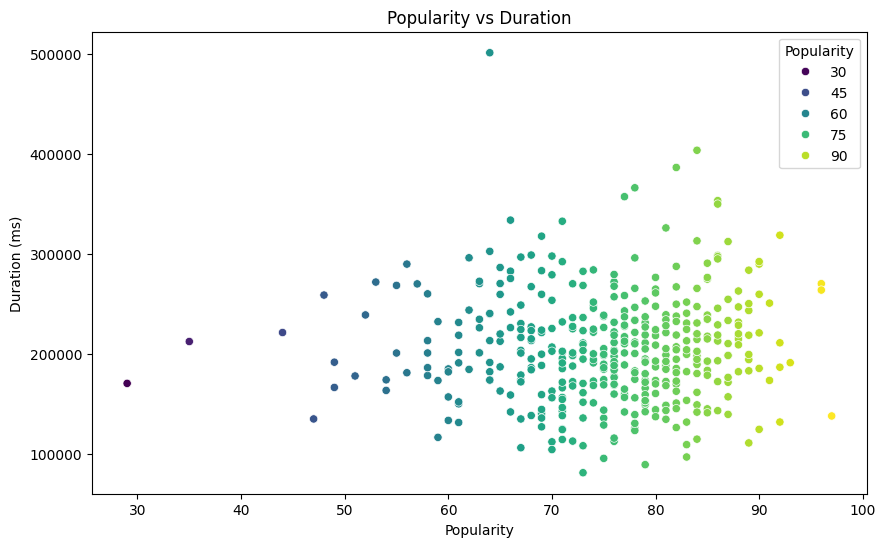

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df, hue='Popularity', palette='viridis')
plt.title('Popularity vs Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

Q4. Which artist has the highest number of tracks? Display the count of tracks for each artist using a countplot.


In [35]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [39]:
highest_track = df['Artist'].value_counts().sort_values(ascending=False).head(10)
highest_track

Artist
Drake        17
Eminem       11
Flo Rida     10
Ludacris     10
Timbaland    10
¥$           10
21 Savage    10
JAY-Z        10
Lil Nas X    10
Lil Baby      9
Name: count, dtype: int64

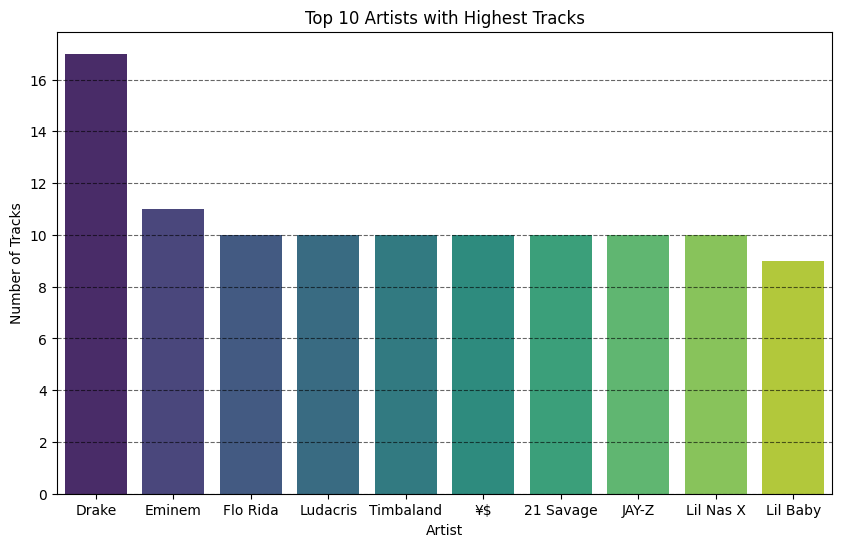

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=highest_track, palette='viridis')
plt.title('Top 10 Artists with Highest Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='black')
plt.show()


In [49]:
# Insight >>
# 1. The most popular artist is 'Drake' with 17 tracks.
# 2. The second most popular artist is 'Eminem' with 11 tracks.

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [50]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [55]:
least_popular_tracks = df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


Q6. Among the top 5 most popular artists, which artist has the highest popularity on average?

In [56]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [89]:

top_artists = df['Artist'].value_counts().head(5).index
artist_avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average popularity of top 5 most popular artists:")
print(artist_avg_popularity)


Average popularity of top 5 most popular artists:
Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


Q7. For the top 5 most popular artists, what are their most popular tracks?


In [86]:

top_artist_tracks = df[df['Artist'].isin(top_artists)]
most_popular_tracks = top_artist_tracks.loc[top_artist_tracks.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
print("Most popular tracks for top 5 artists:")
(most_popular_tracks)


Most popular tracks for top 5 artists:


,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


Q8. Visualize relationships between multiple numerical variables using a pair plot.


In [92]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

<Figure size 1000x600 with 0 Axes>

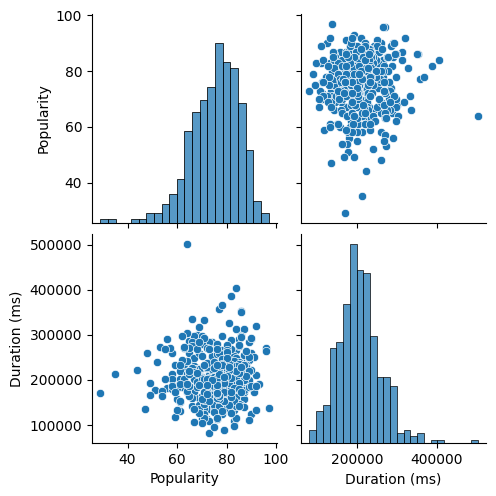

In [102]:
# Pair plot for numerical relationships
plt.figure(figsize=(10,6))
sns.pairplot(df, vars=['Popularity', 'Duration (ms)'],palette='coolwarm')
plt.show()


Q9. Does the duration of tracks vary significantly across different artists? Use a box plot or violin plot.


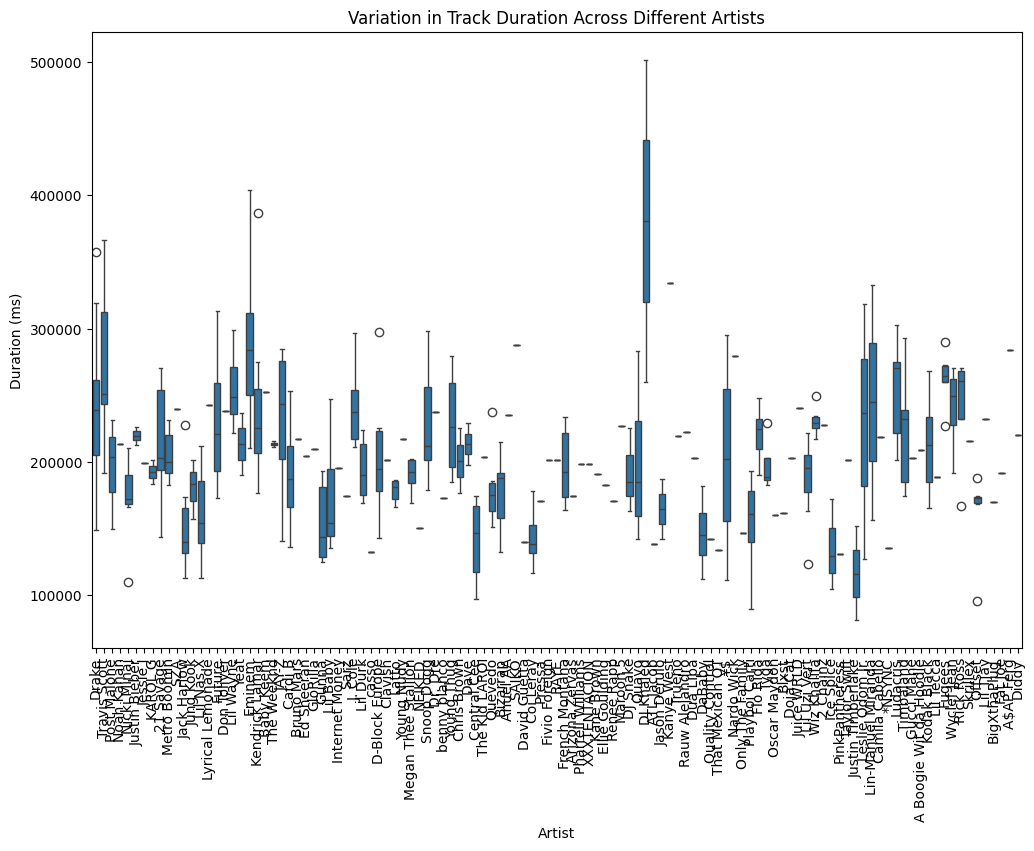

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Variation in Track Duration Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

Q10. How does the distribution of track popularity vary for different artists? Use a swarm plot or violin plot.


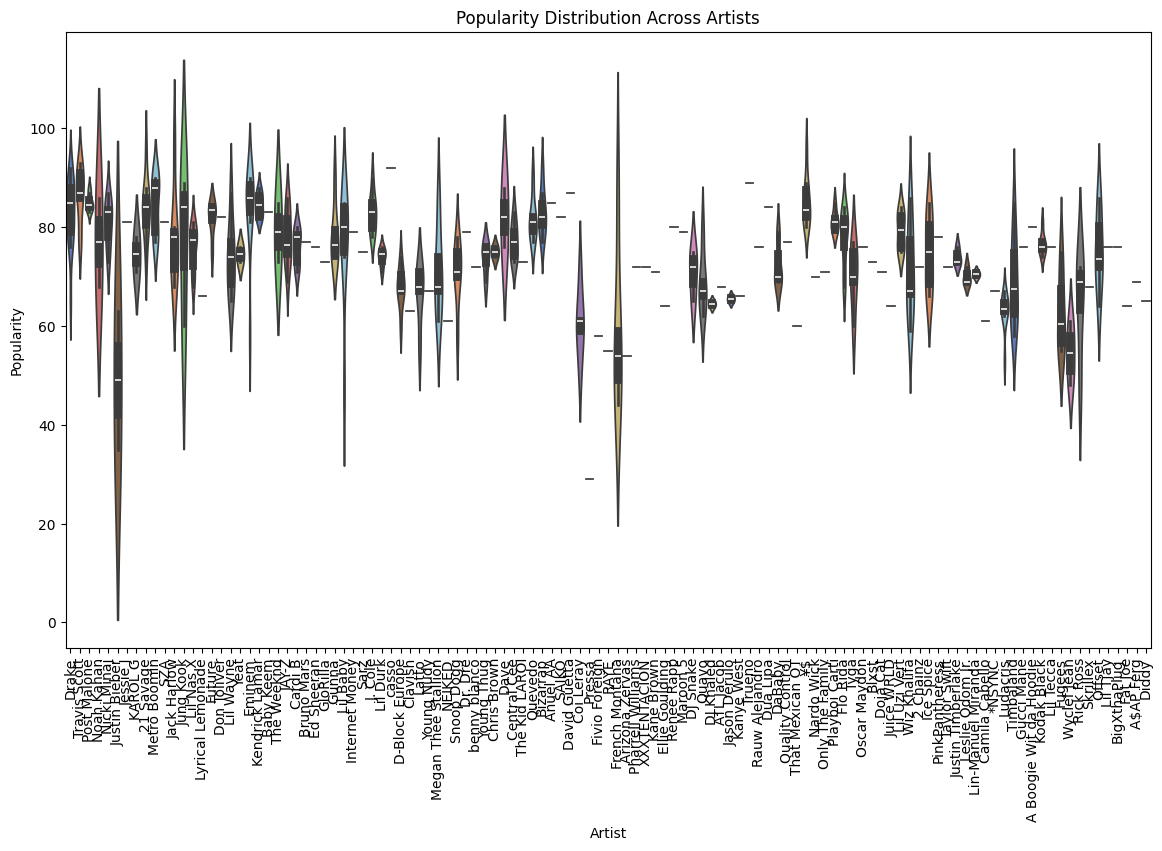

In [106]:
# Violin plot for popularity distribution across artists
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Artist', y='Popularity', palette='muted') # we can also use head() for top 5 artists
plt.title('Popularity Distribution Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
